# Customer Churn Prediction

* Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Data Preparation

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Set the plot style
plt.style.use("tableau-colorblind10")

In [2]:
# read the data using pandas `read_csv` method.
data = pd.read_csv("data.csv")

In [3]:
# view first five rows
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# Columns
print("Number of columns::", data.shape[1])
print("Columns::", data.columns.to_list())

Number of columns:: 21
Columns:: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
# change the column name case into lowercase and space with '_'.
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [6]:
# Change the string case of categorical variable values.
categorical_cols = data.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    data[col] = data[col].str.lower().str.replace(" ", "_")

In [7]:
# Let's check the data again
data.head(2).T

,0,1
customerid,7590-vhveg,5575-gnvde
gender,female,male
seniorcitizen,0,0
partner,yes,no
dependents,no,no
tenure,1,34
phoneservice,no,yes
multiplelines,no_phone_service,no
internetservice,dsl,dsl
onlinesecurity,no,yes


In [8]:
# datatypes
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
# Convert the `totalcharges` datatype form object to numerics
data['totalcharges'] = pd.to_numeric(data.totalcharges, errors='coerce')

# Fill the missing values in 'totalcharges' with value 0
data['totalcharges'] = data.totalcharges.fillna(value=0)

In [10]:
# Convert the `churn` datatype as well
data['churn'] = (data.churn =='yes').astype('int')

## Setting up validation framework
Splitting data into train/validation/test datasets using `train_test_split` method of `sklearn.model_selection` class.

In [11]:
from sklearn.model_selection import train_test_split

# first split the data into ratio 80:20 for training and test dataset
df_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

# next, split the data X_full and y_full into train, and validation dataset
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=42)

In [16]:
# Shape
print("df_train shape::", df_train.shape)
print("df_val shape::", df_val.shape)
print("df_test shape::", df_test.shape)

df_train shape:: (4225, 21)
df_val shape:: (1409, 21)
df_test shape:: (1409, 21)


In [17]:
# Reset the index
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Exploratory Data Analysis

In [18]:
# Check for missing values in data
df_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

There are no null values present in the data

In [19]:
# Churn value counts
df_train['churn'].value_counts()

0    3108
1    1117
Name: churn, dtype: int64

In [20]:
# Churn rate
global_churn = df_train['churn'].mean()
global_churn

0.26437869822485205

The instances for the customer who churns are 1496 which is almost only the 27% of the available data. The given data is highly imbalance data.

In [21]:
numeric_cols = ['tenure', 'monthlycharges', 'totalcharges']
categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

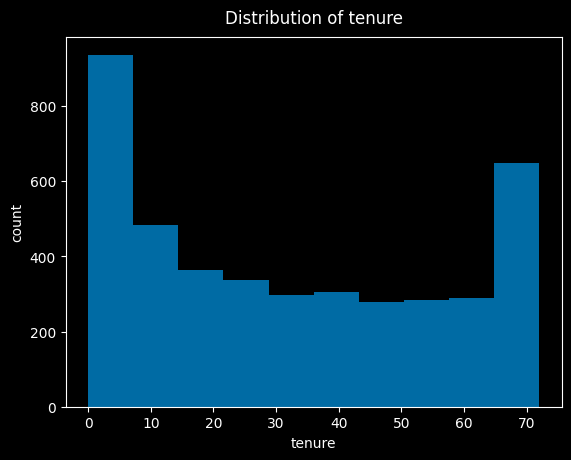

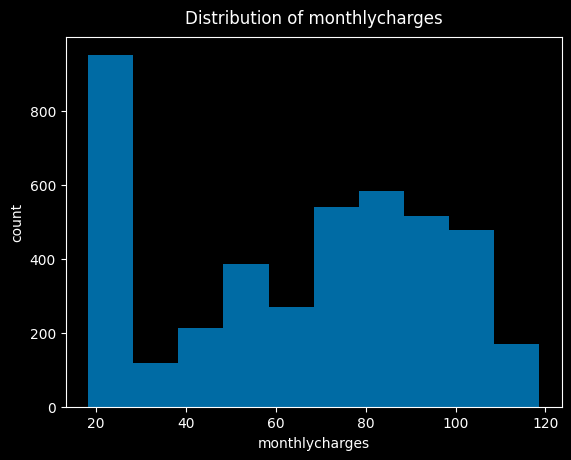

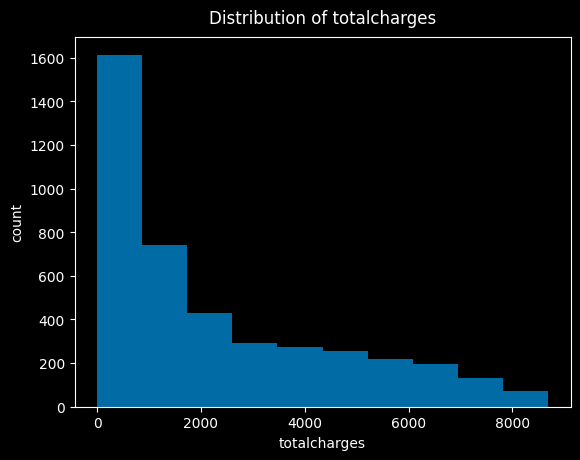

In [22]:
# Univariate analysis
for col in numeric_cols:
    plt.hist(df_train[col])
    plt.title(f"Distribution of {col}", size=12, pad=10)
    plt.xlabel(f"{col}", size=10)
    plt.ylabel("count", size=10)
    plt.show()

In [23]:
# Unique values in categorical data
for col in categorical_cols:
    print(col)
    print("Number of unique::", df_train[col].nunique())
    print(df_train[col].unique())
    print("---"*10)

gender
Number of unique:: 2
['male' 'female']
------------------------------
seniorcitizen
Number of unique:: 2
[0 1]
------------------------------
partner
Number of unique:: 2
['no' 'yes']
------------------------------
dependents
Number of unique:: 2
['no' 'yes']
------------------------------
phoneservice
Number of unique:: 2
['yes' 'no']
------------------------------
multiplelines
Number of unique:: 3
['no' 'no_phone_service' 'yes']
------------------------------
internetservice
Number of unique:: 3
['no' 'fiber_optic' 'dsl']
------------------------------
onlinesecurity
Number of unique:: 3
['no_internet_service' 'no' 'yes']
------------------------------
onlinebackup
Number of unique:: 3
['no_internet_service' 'yes' 'no']
------------------------------
deviceprotection
Number of unique:: 3
['no_internet_service' 'yes' 'no']
------------------------------
techsupport
Number of unique:: 3
['no_internet_service' 'yes' 'no']
------------------------------
streamingtv
Number of uniq

### Feature importance: Churn Rate and Risk ratio

Feature importance analysis- identifying which features affect our target variable.


**Churn Rate**

In [24]:
# Compute the churn rate by gender.
gender_churn = df_train.groupby(by=['gender']).mean()['churn']

# Compute the churn rate by seniorcitizen.
seniorcitizen_churn = df_train.groupby(by=['seniorcitizen']).mean()['churn']

# Compute the churn rate by partner.
partner_churn = df_train.groupby(by=['partner']).mean()['churn']

In [25]:
# data preparation
churn_rate = pd.concat([gender_churn, seniorcitizen_churn, partner_churn])
churn_rate.index = ['Female', 'Male', 'NotSCitizen', 'SCitizen', 'NoPartner', 'Partner']

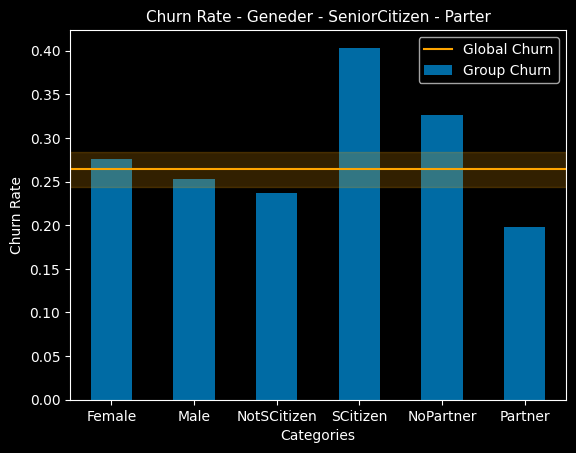

In [26]:
# plot
churn_rate.plot(kind='bar', label='Group Churn')
plt.axhspan(ymin=global_churn-0.02, ymax=global_churn+0.02, color='orange', alpha=0.2)
plt.axhline(y=global_churn, label='Global Churn', color='orange')

plt.xlabel("Categories")
plt.ylabel("Churn Rate")
plt.title("Churn Rate - Geneder - SeniorCitizen - Parter", size=11)

plt.xticks(rotation=0)
plt.legend()
plt.show()

In [27]:
from IPython.display import display

for col in categorical_cols:
    print(col)
    grp_churn = df_train.groupby(by=[col])['churn'].agg(func=['mean'])
    grp_churn['diff'] = grp_churn['mean'] - global_churn
    grp_churn['risk_ratio'] = grp_churn['mean'] / global_churn
    display(grp_churn)
    print()

gender


,mean,diff,risk_ratio
gender,,,
female,0.275828,0.011450,1.043308
male,0.253566,-0.010812,0.959103



seniorcitizen


,mean,diff,risk_ratio
seniorcitizen,,,
0,0.237274,-0.027105,0.897477
1,0.403483,0.139105,1.526157



partner


,mean,diff,risk_ratio
partner,,,
no,0.326157,0.061778,1.233672
yes,0.198335,-0.066044,0.750193



dependents


,mean,diff,risk_ratio
dependents,,,
no,0.306424,0.042046,1.159036
yes,0.164537,-0.099842,0.622352



phoneservice


,mean,diff,risk_ratio
phoneservice,,,
no,0.261194,-0.003185,0.987954
yes,0.264714,0.000335,1.001267



multiplelines


,mean,diff,risk_ratio
multiplelines,,,
no,0.252461,-0.011918,0.954920
no_phone_service,0.261194,-0.003185,0.987954
yes,0.278615,0.014237,1.053849



internetservice


,mean,diff,risk_ratio
internetservice,,,
dsl,0.198766,-0.065612,0.751824
fiber_optic,0.408944,0.144565,1.546811
no,0.074725,-0.189653,0.282645



onlinesecurity


,mean,diff,risk_ratio
onlinesecurity,,,
no,0.410621,0.146242,1.553155
no_internet_service,0.074725,-0.189653,0.282645
yes,0.151741,-0.112637,0.573954



onlinebackup


,mean,diff,risk_ratio
onlinebackup,,,
no,0.400331,0.135953,1.514234
no_internet_service,0.074725,-0.189653,0.282645
yes,0.215426,-0.048953,0.814837



deviceprotection


,mean,diff,risk_ratio
deviceprotection,,,
no,0.390113,0.125734,1.475583
no_internet_service,0.074725,-0.189653,0.282645
yes,0.222146,-0.042233,0.840256



techsupport


,mean,diff,risk_ratio
techsupport,,,
no,0.411063,0.146685,1.554828
no_internet_service,0.074725,-0.189653,0.282645
yes,0.153530,-0.110848,0.580721



streamingtv


,mean,diff,risk_ratio
streamingtv,,,
no,0.339136,0.074757,1.282765
no_internet_service,0.074725,-0.189653,0.282645
yes,0.293511,0.029133,1.110192



streamingmovies


,mean,diff,risk_ratio
streamingmovies,,,
no,0.334746,0.070367,1.266160
no_internet_service,0.074725,-0.189653,0.282645
yes,0.298256,0.033877,1.128140



contract


,mean,diff,risk_ratio
contract,,,
month-to-month,0.426730,0.162351,1.614085
one_year,0.109272,-0.155107,0.413314
two_year,0.025202,-0.239177,0.095324



paperlessbilling


,mean,diff,risk_ratio
paperlessbilling,,,
no,0.161773,-0.102606,0.611899
yes,0.336013,0.071634,1.270953



paymentmethod


,mean,diff,risk_ratio
paymentmethod,,,
bank_transfer_(automatic),0.175896,-0.088483,0.665317
credit_card_(automatic),0.149615,-0.114764,0.565912
electronic_check,0.442716,0.178337,1.674551
mailed_check,0.196738,-0.067641,0.744152


### Feature Importance - Mutual Information

**Categorical Data**


In [28]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(col):
    return mutual_info_score(col, df_train.churn)

df_train[categorical_cols].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.100157
onlinesecurity      0.060861
techsupport         0.060612
internetservice     0.050984
onlinebackup        0.046340
deviceprotection    0.043512
paymentmethod       0.040489
streamingtv         0.031582
streamingmovies     0.031242
paperlessbilling    0.019712
dependents          0.011485
partner             0.010608
seniorcitizen       0.009044
multiplelines       0.000398
gender              0.000318
phoneservice        0.000003
dtype: float64

Mutual information is a measure of feature importance for categorical fetures. The above table shows feature importance score for each categorical columns for predicting customer churn in descending order. Higher the score greater the importance of feature.

### Feature Importance - Correlation
**Numerical Columns**

In [29]:
df_train[numeric_cols].describe()

,tenure,monthlycharges,totalcharges
count,4225.000000,4225.000000,4225.000000
mean,32.144379,64.992994,2280.413337
std,24.340447,30.081997,2263.366449
min,0.000000,18.250000,0.000000
25%,9.000000,35.900000,411.150000
50%,28.000000,70.650000,1400.550000
75%,55.000000,90.000000,3772.500000
max,72.000000,118.600000,8684.800000


In [30]:
# Compute the pearson correlation with numeric columns
df_train[numeric_cols].corrwith(other=df_train['churn'])

tenure           -0.351477
monthlycharges    0.180855
totalcharges     -0.204463
dtype: float64

In [31]:
# Feature importance 
df_train[numeric_cols].corrwith(other=df_train['churn']).abs()

tenure            0.351477
monthlycharges    0.180855
totalcharges      0.204463
dtype: float64

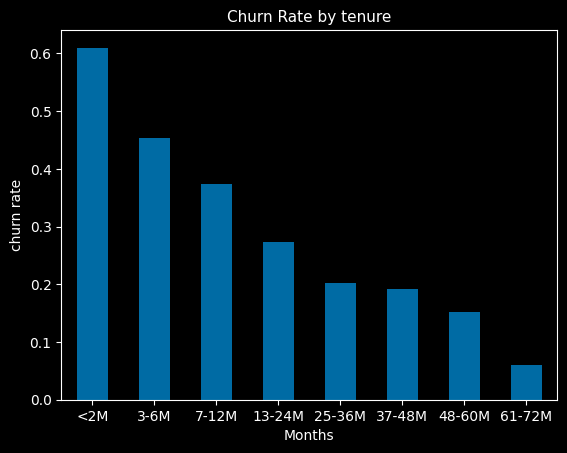

In [32]:
# Let's examine the relation of numeric variables with target variable 'churn'

# Tenture is number of months the customer has stayed with the company.
tenure  = pd.cut( x=df_train['tenure'], 
       bins=[0, 2, 6, 12, 24, 36, 48, 60, 72], 
       labels=['<2M', '3-6M', '7-12M', '13-24M', '25-36M', '37-48M', '48-60M', '61-72M'])

# Data preparation
tenure_df = pd.DataFrame({
    'tenure':tenure,
    'churn':df_train['churn']
})

# plot
tenure_df.groupby(by=['tenure'])['churn'].agg(func='mean').plot(kind='bar')
plt.title("Churn Rate by tenure", size=11)
plt.xlabel("Months", size=10)
plt.ylabel("churn rate", size=10)

plt.xticks(rotation=0)
plt.show()


We can see that the customer with more tenure is more likely to stay as their churn rate is less as compare to the churn rate of the customers with less tenure.

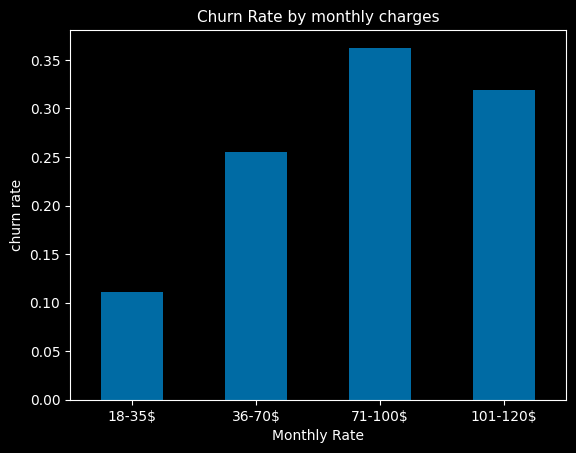

In [33]:
# Monthly Charges is the amount charged to the customer monthly.

monthlyCharge  = pd.cut( x=df_train['monthlycharges'], 
       bins=[18, 35, 70, 90, 120], 
       labels=['18-35$', '36-70$', '71-100$', '101-120$'])

# Data preparation
monthlyCharge_df = pd.DataFrame({
    'monthlyCharge':monthlyCharge,
    'churn':df_train['churn']
})

# plot
monthlyCharge_df.groupby(by=['monthlyCharge'])['churn'].agg(func='mean').plot(kind='bar')
plt.title("Churn Rate by monthly charges", size=11)
plt.xlabel("Monthly Rate", size=10)
plt.ylabel("churn rate", size=10)

plt.xticks(rotation=0)
plt.show()


As the monthly charges increases the churn rate is also increases.

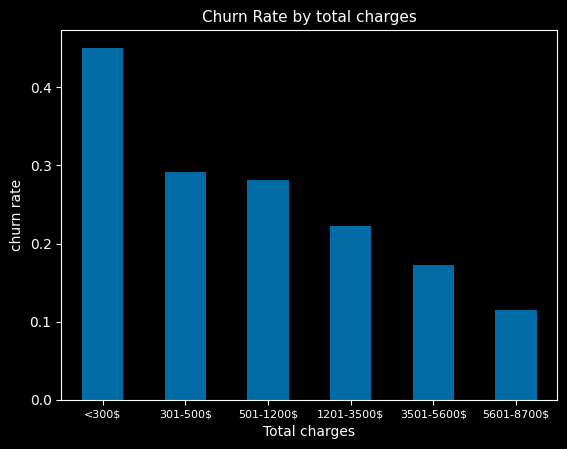

In [34]:
# Total Charges is the total amount charged to the customer.

totalCharge  = pd.cut( x=df_train['totalcharges'],
                    bins=[0, 300, 500, 1200, 3500, 5600, 8700], 
                    labels=['<300$', '301-500$', '501-1200$', '1201-3500$', '3501-5600$', '5601-8700$'])

# Data preparation
totalCharge_df = pd.DataFrame({
    'totalCharge':totalCharge,
    'churn':df_train['churn']
})

# plot
totalCharge_df.groupby(by=['totalCharge'])['churn'].agg(func='mean').plot(kind='bar')
plt.title("Churn Rate by total charges", size=11)
plt.xlabel("Total charges", size=10)
plt.ylabel("churn rate", size=10)

plt.xticks(rotation=0, size=8)
plt.show()


From the plots, we can say that higher the total charges the customers likely to stay.

## One-Hot Encoding

In [36]:
# one hot encoding using sklearn.
from sklearn.feature_extraction import DictVectorizer

# Initialize the dictionary vectorizer.
dv = DictVectorizer(sparse=False)

In [37]:
# Convert the data into dictionary object
train_dict = df_train[categorical_cols + numeric_cols].to_dict(orient='records')
val_dict = df_val[categorical_cols + numeric_cols].to_dict(orient='records')
test_dict = df_test[categorical_cols + numeric_cols].to_dict(orient='records')

# fit and transform the data into 0's and 1's
X_transform_train = dv.fit_transform(train_dict)
X_transform_val = dv.transform(val_dict)
X_transform_test = dv.transform(test_dict)


## Training Logistic Regression with Scikit-Learn
We will trained a model using `LogisticRegression` of `Scikit-learn` library on training data and validate the accuracy of the model using validation dataset.

In [38]:
# Logisitc Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_transform_train, df_train['churn'])

# make predictions on validation
y_preds = model.predict_proba(X_transform_val)

# on training data
y_train_preds = model.predict_proba(X_transform_train)

# select only probability of 1 or churn.
y_preds = y_preds[:, 1]
y_train_preds = y_train_preds[:, 1]

In [39]:
# Create a threshold
threshold = 0.6

# accuracy - total predicted positive / total actual positive
print("Accuracy - ")
print("Training dataset::", (df_train['churn'] == (y_train_preds >= threshold)).mean())
print("validation dataset::", (df_val['churn'] == (y_preds >= threshold)).mean())

Accuracy - 
Training dataset:: 0.7983431952662722
validation dataset:: 0.7899219304471257


### Model Coefficients

In [40]:
# coefficients
# bias term
w0 = model.intercept_[0] 

# Coefficient of each feature
w  = model.coef_[0]

In [41]:
# Features with its corresponding coefficient values
dict(zip(dv.get_feature_names(), w))

d:\ML-BootCamp\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.6546896549095884,
 'contract=one_year': -0.1669684475498409,
 'contract=two_year': -0.6297088850779773,
 'dependents=no': -0.03619769330827229,
 'dependents=yes': -0.10578998440301524,
 'deviceprotection=no': 0.027582331008625987,
 'deviceprotection=no_internet_service': -0.12693278095030436,
 'deviceprotection=yes': -0.04263722776936849,
 'gender=female': 0.01826170844574034,
 'gender=male': -0.16024938615609718,
 'internetservice=dsl': -0.33569128190443587,
 'internetservice=fiber_optic': 0.32063638514298626,
 'internetservice=no': -0.12693278095030436,
 'monthlycharges': 0.0018738176654762215,
 'multiplelines=no': -0.22563051571856965,
 'multiplelines=no_phone_service': 0.12820797145222876,
 'multiplelines=yes': -0.044565133445193514,
 'onlinebackup=no': 0.07294105377796307,
 'onlinebackup=no_internet_service': -0.12693278095030436,
 'onlinebackup=yes': -0.08799595053984209,
 'onlinesecurity=no': 0.20313578243640254,
 'onlinesecurity=no_internet_service

In [42]:
# Let's trained a model with selected features

features = ['seniorcitizen', 'partner', 'dependents', 'tenure', 
            'phoneservice', 'contract', 'monthlycharges', 'totalcharges']

# One hot encoding using 'DictVectorizer' method.
dv = DictVectorizer(sparse=False)

# convert data into dictionary
df_train_dict = df_train[features].to_dict(orient='records')
df_test_dict = df_test[features].to_dict(orient='records')

df_transform_train = dv.fit_transform(df_train_dict)
df_transform_test = dv.transform(df_test_dict)


In [43]:
# fit data
model.fit(df_transform_train, df_train['churn'])
y_predictions = model.predict_proba(df_transform_test)[:, 1]

print("Accuracy::", (df_test['churn'] == (y_predictions >= threshold)).mean())

Accuracy:: 0.7913413768630234


In [44]:
# Coeffiencts.
dict(zip(dv.get_feature_names(), model.coef_[0]))

d:\ML-BootCamp\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.7491962623712831,
 'contract=one_year': -0.30153442593891555,
 'contract=two_year': -1.2170784565479815,
 'dependents=no': -0.30599924480948376,
 'dependents=yes': -0.4634173751473664,
 'monthlycharges': 0.027315251146017478,
 'partner=no': -0.35202471833499616,
 'partner=yes': -0.41739190183434555,
 'phoneservice=no': 0.09530799865149105,
 'phoneservice=yes': -0.8647246188811629,
 'seniorcitizen': 0.2858947720246039,
 'tenure': -0.05415266620884881,
 'totalcharges': 0.00019614687956942528}

# How to use model

In [45]:
# Let's select the random customer from the test data.
idx = np.random.randint(0, 1409)
customer = df_test_dict[idx]
customer = dv.transform(customer)

# predict the whether this customer churn or not using model
prediction = model.predict_proba(customer)[:, 1][0]
customer_choice = 'Yes' if (prediction >= 0.5) else 'No'
print("Will customer churn::", customer_choice)

Will customer churn:: No


In [47]:
df_test.iloc[idx]['churn']

0